<a href="https://colab.research.google.com/github/Tiwari666/Classification_Model/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frist lets add sythetic latitude and longitude columns in our dataset to create a new column--Distance.**

In [50]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

# Load the dataset
df = pd.read_csv('/content/transaction_anomalies_dataset.csv')
data = df.copy()

city_center_coordinates = (37.7749, -122.4194)  # Latitude and longitude of the city center

noise = 0.01  # Variation in latitude and longitude
np.random.seed(42)  # Set random seed for reproducibility
df['Latitude'] = np.random.uniform(city_center_coordinates[0] - noise, city_center_coordinates[0] + noise, size=len(df))
df['Longitude'] = np.random.uniform(city_center_coordinates[1] - noise, city_center_coordinates[1] + noise, size=len(df))
df['Customer_Home_Latitude'] = np.random.uniform(city_center_coordinates[0] - noise, city_center_coordinates[0] + noise, size=len(df))
df['Customer_Home_Longitude'] = np.random.uniform(city_center_coordinates[1] - noise, city_center_coordinates[1] + noise, size=len(df))

# Introduce outliers for anomaly detection
# Set some coordinates far away from the city center (e.g., more than 100 km away)
# one can adjust the number of outliers as needed
num_outliers = 10
np.random.seed(42)  # Set random seed for reproducibility
outlier_latitudes = np.random.uniform(38, 39, size=num_outliers)  # Sample latitudes far away from the city center
outlier_longitudes = np.random.uniform(-123, -122, size=num_outliers)  # Sample longitudes far away from the city center

# Replace some randomly selected coordinates with outlier values
np.random.seed(42)  # Set random seed for reproducibility
outlier_indices = np.random.choice(df.index, num_outliers, replace=False)
df.loc[outlier_indices, 'Customer_Home_Latitude'] = outlier_latitudes
df.loc[outlier_indices, 'Customer_Home_Longitude'] = outlier_longitudes

# Calculate distance between transaction occurring place and customer home address
def calculate_distance(row):
    transaction_coords = (row['Latitude'], row['Longitude'])
    home_coords = (row['Customer_Home_Latitude'], row['Customer_Home_Longitude'])
    return geodesic(transaction_coords, home_coords).kilometers

df['Distance'] = df.apply(calculate_distance, axis=1)



In [51]:
df.drop(columns=['Latitude','Longitude','Customer_Home_Longitude','Customer_Home_Latitude'], inplace=True)

In [52]:
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Distance
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,0.894910
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,1.625405
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,1.162937
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,0.797726
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,0.487278


In [53]:
df.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income,Distance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05,1.922466
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05,9.270558
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05,0.033514
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05,0.644078
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05,1.012373
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06,1.427728
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06,134.336931


In [54]:
df.isna().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
Distance                       0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
 12  Distance                     1000 non-null   float64
dtypes: float64(3), int6

In [56]:
df.duplicated().sum()

0

# **Feature engineering--creating new features and performing one-hot encoding for categorical variables:**

In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Define columns to be encoded and scaled
categorical_cols = ['Day_of_Week', 'Time_of_Day', 'Gender', 'Account_Type']
numeric_cols = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
                'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age',
                'Income','Distance']

# One-hot encoding for categorical variables
ohe = OneHotEncoder()
encoded_cols = ohe.fit_transform(df[categorical_cols]).toarray()
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(categorical_cols))

# Feature scaling for numeric variables
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Concatenate encoded categorical columns and scaled numeric columns, id dropped automatically
X_df = pd.concat([encoded_df, df[numeric_cols]], axis=1)

In [58]:
from sklearn.ensemble import IsolationForest

In [59]:
iso_forest=IsolationForest(n_estimators=10, contamination='auto', random_state=42)
iso_forest.fit(X_df);

Both score_samples() and decision_function() methods provide anomaly scores, but score_samples() returns normalized scores, while decision_function() returns raw scores that reflect the model's decision boundary more directly. The choice between these methods depends on how we intend to interpret and use the anomaly scores in our specific application.

anomaly_score - 0.5 = value1

value1 + 1 = decision_function

In logistic regression, the decision function computes the probability of a sample belonging to each class using the logistic function. The class with the highest probability is then predicted as the final class label, where higher scores indicate that the sample is more likely to be an anomaly or outlier.

In Support Vector Machines (SVMs), the decision function calculates the signed distance of a sample from the decision boundary (hyperplane). The sign of this distance determines the predicted class label, Where samples with negative values may be considered outliers, anomoly.

In classification model,

Particularly in one-class SVMs (OCSVM), the decision function can be used for outlier detection where samples with negative values may be considered outliers, anomoly.

The decision function in Isolation Forests doesn't directly provide classification labels like SVMs. Instead, it computes an anomaly score for each sample, where higher scores indicate that the sample is more likely to be an anomaly or outlier.

The anomaly scores generated by Isolation Forests are not influenced by a contamination parameter like in OCSVM.

contamination parameter: The contamination parameter is a parameter used in some anomaly detection algorithms, such as One-Class Support Vector Machines (OCSVM) and Isolation Forests. It represents the expected proportion of outliers (anomalies) in the dataset.

In [60]:
Anamoly_score_df = pd.DataFrame({'Transaction_ID':df['Transaction_ID'],
                                'Anamoly_Prediction': iso_forest.predict(X_df),
                              'Anamoly_Score': iso_forest.score_samples(X_df),
                              'decision_function': iso_forest.decision_function(X_df)})

Anamoly_score_df

,Transaction_ID,Anamoly_Prediction,Anamoly_Score,decision_function
0,TX0,1,-0.390933,0.109067
1,TX1,1,-0.377453,0.122547
2,TX2,1,-0.400959,0.099041
3,TX3,1,-0.433112,0.066888
4,TX4,1,-0.420533,0.079467
...,...,...,...,...
995,TX995,1,-0.393530,0.106470
996,TX996,1,-0.376323,0.123677
997,TX997,1,-0.441391,0.058609
998,TX998,1,-0.470916,0.029084


In [61]:
filtered_df = Anamoly_score_df[Anamoly_score_df['Anamoly_Prediction'] == 1]

In [62]:
Anamoly_score_df.Anamoly_Prediction.value_counts()

Anamoly_Prediction
 1    975
-1     25
Name: count, dtype: int64

In [63]:
Anamoly_score_df[['Anamoly_Prediction', 'Anamoly_Score', 'decision_function']].corr()

,Anamoly_Prediction,Anamoly_Score,decision_function
Anamoly_Prediction,1.000000,0.454644,0.454644
Anamoly_Score,0.454644,1.000000,1.000000
decision_function,0.454644,1.000000,1.000000


In [64]:
Anamoly_score_df.groupby('Anamoly_Prediction', as_index=True).agg({'Anamoly_Prediction': ['count'],
                                                     'Anamoly_Score': ['min', 'max'],
                                                     'decision_function': ['min', 'max']})

Anamoly_Prediction Anamoly_Score            \
                                count           min       max   
Anamoly_Prediction                                              
-1                                 25     -0.541196 -0.500868   
 1                                975     -0.497553 -0.349150   

                   decision_function            
                                 min       max  
Anamoly_Prediction                              
-1                         -0.041196 -0.000868  
 1                          0.002447  0.150850

In [65]:
total_df = pd.concat([df['Transaction_ID'],
                      X_df.reset_index(drop=True),
                      pd.DataFrame(iso_forest.predict(X_df), columns=['Predicted_Class']),
                      pd.DataFrame(iso_forest.decision_function(X_df), columns=['Anomaly_Score'])],
                     axis=1)
total_df.head()

,Transaction_ID,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Time_of_Day_00:00,Time_of_Day_01:00,...,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income,Distance,Predicted_Class,Anomaly_Score
0,TX0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.046877,0.450447,-0.167190,-0.018383,1.634423,-0.335987,1.568007,-0.110896,1,0.109067
1,TX1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.085276,1.347752,0.946939,-1.196766,0.796810,0.025990,-0.775688,-0.032060,1,0.122547
2,TX2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.236970,-1.344162,-0.542425,-1.668119,-0.399781,1.473897,-0.314592,-0.081970,1,0.099041
3,TX3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.009525,-0.446858,-1.511008,0.924324,1.514764,1.473897,-0.798977,-0.121385,1,0.066888
4,TX4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.138814,-1.344162,0.311731,-1.196766,-0.998076,1.111920,-0.710830,-0.154889,1,0.079467


while the decision function provides more detailed information about the distance of samples from the decision boundary or the probability of belonging to a class, the predict method simply gives the predicted class labels based on a threshold applied to the output of the decision function.

In [66]:
total_df.Predicted_Class.value_counts()

Predicted_Class
 1    975
-1     25
Name: count, dtype: int64

In [67]:
#total_df['Predicted_Class'] = np.where(total_df['Predicted_Class'] == -1, 'Anomaly', 'Not an Anomaly')

#For Anomaly_Decile, Data points with higher anomaly scores will be assigned to lower deciles, indicating more severe anomalies.
total_df['Anomaly_Decile'] = 10 - pd.qcut(total_df['Anomaly_Score'], 10, labels=False)

front_vars = ['Predicted_Class', 'Anomaly_Score', 'Anomaly_Decile']

total_df = total_df[front_vars + [col for col in total_df.columns if col not in front_vars]]

total_df.head()

,Predicted_Class,Anomaly_Score,Anomaly_Decile,Transaction_ID,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,...,Account_Type_Current,Account_Type_Savings,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income,Distance
0,1,0.109067,2,TX0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.046877,0.450447,-0.167190,-0.018383,1.634423,-0.335987,1.568007,-0.110896
1,1,0.122547,1,TX1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.085276,1.347752,0.946939,-1.196766,0.796810,0.025990,-0.775688,-0.032060
2,1,0.099041,3,TX2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-0.236970,-1.344162,-0.542425,-1.668119,-0.399781,1.473897,-0.314592,-0.081970
3,1,0.066888,7,TX3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.009525,-0.446858,-1.511008,0.924324,1.514764,1.473897,-0.798977,-0.121385
4,1,0.079467,5,TX4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.138814,-1.344162,0.311731,-1.196766,-0.998076,1.111920,-0.710830,-0.154889


In [68]:
total_df.Predicted_Class.value_counts()

Predicted_Class
 1    975
-1     25
Name: count, dtype: int64

In [69]:
outlier_fraction=25/975
outlier_fraction

0.02564102564102564

In [70]:
# Merge the data frames Anamoly_score_df and df on 'Transaction_ID'
df_anomaly = data.merge(Anamoly_score_df[['Transaction_ID', 'Anamoly_Prediction']], on='Transaction_ID', how='left')

# Display the new DataFrame
df_anomaly

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type,Anamoly_Prediction
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings,1
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings,1
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings,1
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings,1
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,TX995,901.138758,3,976.363229,17,19,Monday,05:00,46,Female,424746,Savings,1
996,TX996,928.962516,4,1028.292292,10,25,Wednesday,09:00,58,Female,908278,Current,1
997,TX997,950.921600,2,1022.823424,13,28,Friday,02:00,58,Female,1353498,Current,1
998,TX998,933.291962,4,994.325450,10,8,Tuesday,04:00,58,Female,359072,Savings,1


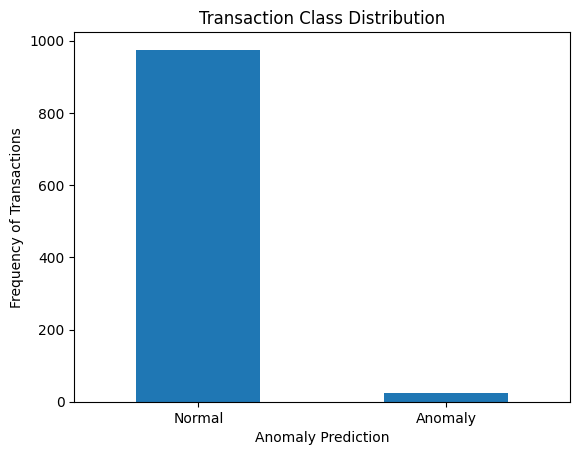

In [71]:
import matplotlib.pyplot as plt

# Correcting the column name to 'Anomaly_Prediction'
classes = pd.value_counts(df_anomaly['Anamoly_Prediction'], sort=True)
classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels=["Normal", "Anomaly"])
plt.xlabel("Anomaly Prediction")
plt.ylabel("Frequency of Transactions")
plt.show()

In [72]:
class_counts = df_anomaly.Anamoly_Prediction.value_counts()
class_counts

Anamoly_Prediction
 1    975
-1     25
Name: count, dtype: int64

In [73]:
# Calculate total count
total_count = class_counts.sum()

# Calculate percentage values for each class
percentage_values = (class_counts / total_count) * 100

# Display the percentage values
print(percentage_values)

Anamoly_Prediction
 1    97.5
-1     2.5
Name: count, dtype: float64


There are 975 normal transactions and 25 fraud transactions. The fraud cases are only 2.5% from all transactions. We have a very unbalanced dataset. Please note that it is a typical scenario in case of fraud and anomaly detection.

In [74]:
print(df.columns)

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type', 'Distance'],
      dtype='object')


In [75]:
print(df_anomaly.columns)

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Volume',
       'Average_Transaction_Amount', 'Frequency_of_Transactions',
       'Time_Since_Last_Transaction', 'Day_of_Week', 'Time_of_Day', 'Age',
       'Gender', 'Income', 'Account_Type', 'Anamoly_Prediction'],
      dtype='object')


# **Creating a line plot to compare the distribution of transaction amounts between anomalies (Anamoly_Prediction == -1) and non-anomalies (Anamoly_Prediction == 1) in df_anomaly**

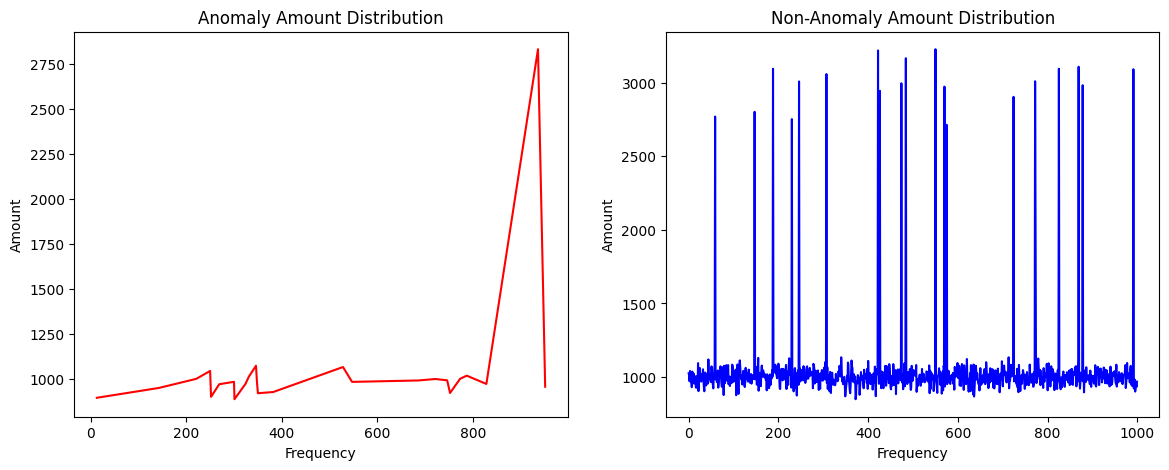

In [76]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(df_anomaly[df_anomaly['Anamoly_Prediction'] == -1]["Transaction_Amount"], color="red")
plt.title("Anomaly Amount Distribution")
plt.xlabel("Frequency")
plt.ylabel("Amount")

plt.subplot(1, 2, 2)
plt.plot(df_anomaly[df_anomaly['Anamoly_Prediction'] == 1]["Transaction_Amount"], color="blue")
plt.title("Non-Anomaly Amount Distribution")
plt.xlabel("Frequency")
plt.ylabel("Amount")

plt.show()

# **Creating a histogram to compare the distribution of transaction amounts between anomalies (Anomaly_Prediction == -1) and non-anomalies (Anomaly_Prediction == 1)**

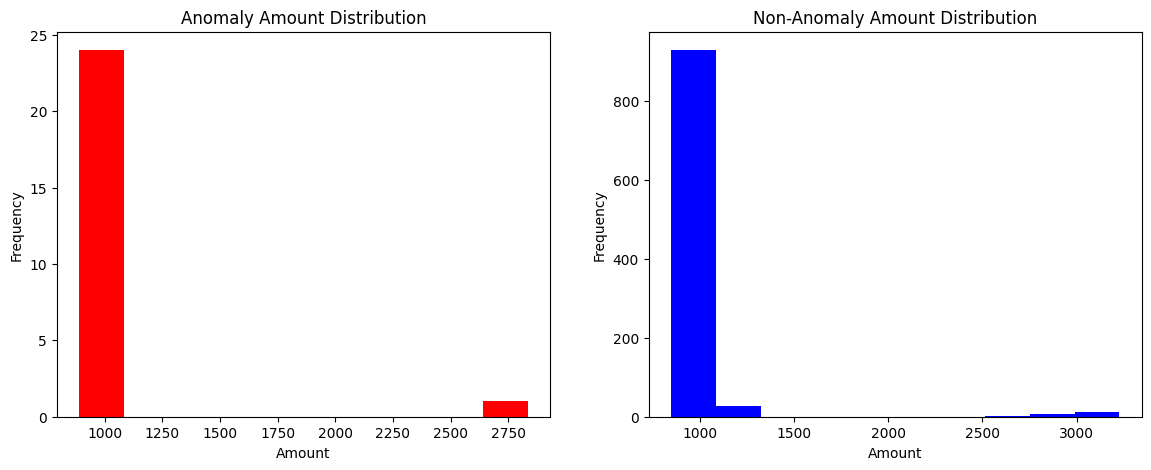

In [77]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_anomaly[df_anomaly['Anamoly_Prediction'] == -1]["Transaction_Amount"], color="red")
plt.title("Anomaly Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df_anomaly[df_anomaly['Anamoly_Prediction'] == 1]["Transaction_Amount"], color="blue")
plt.title("Non-Anomaly Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.show()

In the above two plots, we can see that for the Anomaly data, majority (more than 20 times) of the times, the transaction amount is between 500 and 1100 and only a small number (1 to 3) of times, the transaction amount is between 2600 to 2800. The max amount is less than 2800.

Whereas, for the non-fraud data, almost all of the times, the transaction amount is between 500 and 1300. However, for a very few number of times, the amount is between 2600 and 3500. The max amount is a little over 3500.

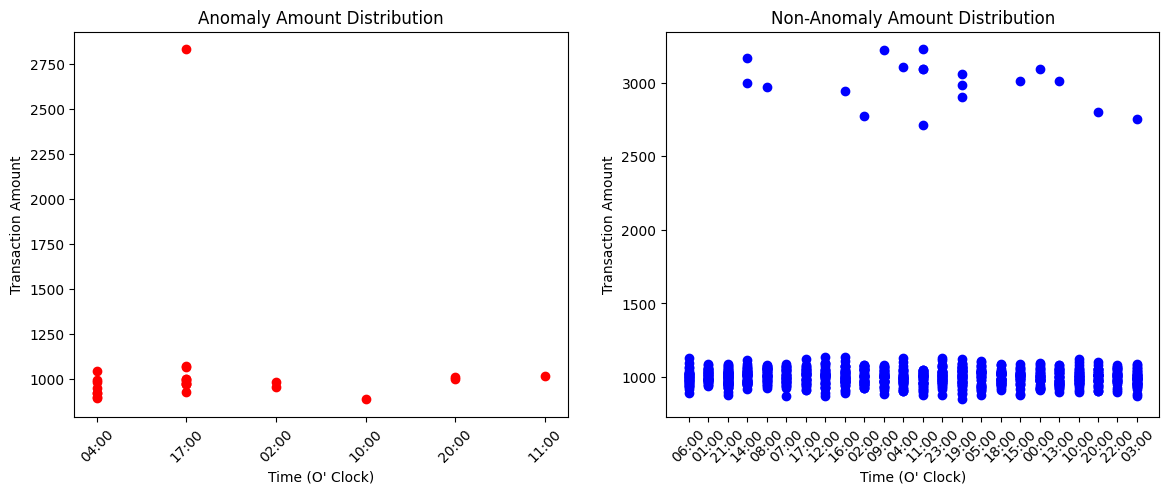

In [78]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_anomaly[df_anomaly['Anamoly_Prediction'] == -1]["Time_of_Day"], df_anomaly[df_anomaly['Anamoly_Prediction'] == -1]["Transaction_Amount"], color="red")
plt.title("Anomaly Amount Distribution")
plt.xlabel("Time (O' Clock)")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.subplot(1, 2, 2)
plt.scatter(df_anomaly[df_anomaly['Anamoly_Prediction'] == 1]["Time_of_Day"], df_anomaly[df_anomaly['Anamoly_Prediction'] == 1]["Transaction_Amount"], color="blue")
plt.title("Non-Anomaly Amount Distribution")
plt.xlabel("Time (O' Clock)")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.show()

Based on the above plot, time and Transaction Amount do not seem to show any significant correlation.

# **Transaction Amount by Account Type**

In [79]:
import plotly.express as px

fig_box_amount = px.box(df_anomaly,
                        x='Account_Type',
                        y='Transaction_Amount',
                        title='Transaction Amount by Account Type')
fig_box_amount.show()

# **Average Transaction Amount vs. Age**

In [80]:
import plotly.express as px

fig_scatter_avg_amount_age = px.scatter(df_anomaly, x='Age',
                                        y='Average_Transaction_Amount',
                                        color='Account_Type',
                                        title='Average Transaction Amount vs Age',
                                        trendline='ols')
fig_scatter_avg_amount_age.show()

# **Count of Transactions by Day of the Week**

In [81]:
import plotly.express as px

fig_day_of_week = px.bar(df_anomaly, x='Day_of_Week',
                         title='Count of Transactions by Day of the Week')
fig_day_of_week.show()


# **Creating a histogram of anomaly scores and their distribution across different class labels.**

In [82]:
import plotly.express as px
from IPython.display import Image, display

class_labels = {1: 'Non-Anomaly', -1: 'Anomaly'}
total_df['Class_Labels'] = total_df['Predicted_Class'].map(class_labels)

fig = px.histogram(total_df, x='Anomaly_Score', color='Class_Labels', nbins=150,
                   title='Distribution of Anomaly Scores')

# To display in JupyterLab
fig.show()

# **Creating a box plot of anomaly scores by decile, with different colors representing the predicted class labels**

This visualization is helpful for understanding the distribution of anomaly scores within each decile and how they vary between anomalies and non-anomalies.

In [83]:
import plotly.express as px

# Map predicted class labels to corresponding labels for the legend
class_labels = {1: 'Non-Anomaly', -1: 'Anomaly'}
total_df['Class_Labels'] = total_df['Predicted_Class'].map(class_labels)

# Create the box plot
fig = px.box(total_df, x='Anomaly_Decile', y='Anomaly_Score', color='Class_Labels',
             title='Box Plot of Anomaly Scores by Decile', category_orders={'Class_Labels': ['Non-Anomaly','Anomaly']})

fig.update_layout(xaxis={'dtick': 1})

# Show the plot
fig.show()


# **Model Development**

In [84]:
total_df.drop(columns='Class_Labels', inplace=True)

In [ ]:
total_df.head()

,Predicted_Class,Anomaly_Score,Anomaly_Decile,Transaction_ID,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,...,Account_Type_Current,Account_Type_Savings,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income,Distance
0,1,0.109067,2,TX0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.046877,0.450447,-0.167190,-0.018383,1.634423,-0.335987,1.568007,-0.110896
1,1,0.122547,1,TX1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.085276,1.347752,0.946939,-1.196766,0.796810,0.025990,-0.775688,-0.032060
2,1,0.099041,3,TX2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-0.236970,-1.344162,-0.542425,-1.668119,-0.399781,1.473897,-0.314592,-0.081970
3,1,0.066888,7,TX3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.009525,-0.446858,-1.511008,0.924324,1.514764,1.473897,-0.798977,-0.121385
4,1,0.079467,5,TX4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.138814,-1.344162,0.311731,-1.196766,-0.998076,1.111920,-0.710830,-0.154889


# **Splitting the data into features and target:**

In [85]:
X=total_df.drop(columns=['Transaction_ID','Predicted_Class','Anomaly_Score','Anomaly_Decile'])

In [ ]:
X.head()

,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Time_of_Day_00:00,Time_of_Day_01:00,Time_of_Day_02:00,...,Account_Type_Current,Account_Type_Savings,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income,Distance
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.046877,0.450447,-0.167190,-0.018383,1.634423,-0.335987,1.568007,-0.110896
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,-0.085276,1.347752,0.946939,-1.196766,0.796810,0.025990,-0.775688,-0.032060
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.236970,-1.344162,-0.542425,-1.668119,-0.399781,1.473897,-0.314592,-0.081970
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.009525,-0.446858,-1.511008,0.924324,1.514764,1.473897,-0.798977,-0.121385
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.138814,-1.344162,0.311731,-1.196766,-0.998076,1.111920,-0.710830,-0.154889


In [86]:
y=total_df['Predicted_Class']

In [87]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

In [88]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Predicted_Class, Length: 1000, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Addressing the problem of unbalanced data using the SMOTE technique, making it balalnced dataset:**

In [90]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE only on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [91]:
from imblearn.over_sampling import SMOTE

# Print class distribution before oversampling
print(f"Before SMOTE, counts of label '1': {sum(y_train.values.ravel() == 1)} and '-1':{sum(y_train.values.ravel() == -1)}")

# Print class distribution after oversampling
print(f"After SMOTE, counts of label '1': {sum(y_train_resampled.values.ravel() == 1)} and '-1':{sum(y_train_resampled.values.ravel() == -1)}")


Before SMOTE, counts of label '1': 782 and '-1':18
After SMOTE, counts of label '1': 782 and '-1':782


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Isolation Forest": IsolationForest(n_estimators=100, contamination='auto', random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination='auto',novelty=True),
    "One-Class SVM": OneClassSVM(gamma='auto')
}

In [93]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_resampled)  # Fit the model

    # Predict outliers
    y_pred = model.predict(X_test)
    # # Reshape the prediction values
    # y_pred[y_pred == 1] = 0  # Set predicted labels to 0 for valid transactions
    # y_pred[y_pred == -1] = 1 # Set predicted labels to 1 for anomalous transactions

    # Calculate accuracy and classification report
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted', zero_division='warn')  # Anomaly class
    recall = recall_score(y_test, y_pred, average='weighted', zero_division='warn')  # Anomaly class
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division='warn')  # Anomaly class

    # Print results
    print(f"Classifier: {name}")
    print(f"Accuracy, precision, recall, f1 : {acc},{precision},{recall},{f1}")
    print('-------------------------------------------------\n')



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



Classifier: Isolation Forest
Accuracy, precision, recall, f1 : 0.965,0.931225,0.965,0.9478117048346055
-------------------------------------------------

Classifier: Local Outlier Factor
Accuracy, precision, recall, f1 : 0.585,0.9587702922077922,0.5850000000000001,0.7068144952545298
-------------------------------------------------

Classifier: One-Class SVM
Accuracy, precision, recall, f1 : 0.345,0.9234870766488414,0.345,0.4826657294853772
-------------------------------------------------



# **Hyperparameter tuning for our best model Isolation Forest:**

In [94]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Isolation Forest model
iso_model = IsolationForest(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_samples': ['auto', 100, 200],
    'contamination': [0.05, 0.1, 0.15],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_iso = RandomizedSearchCV(
    iso_model, param_distributions=param_dist,
    scoring=['f1_micro', 'accuracy'], refit='f1_micro', cv=10,
    n_iter=100, random_state=42
)

# Fit the randomized search model
random_iso.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_iso.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationF

Best Parameters: {'n_estimators': 50, 'max_samples': 200, 'contamination': 0.05, 'bootstrap': True}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



# Finding the optimal parameters of the best model: IsolationForest

In [95]:
random_iso.best_estimator_

IsolationForest(bootstrap=True, contamination=0.05, max_samples=200,
                n_estimators=50, random_state=42)

 # Finding the index (in the parameter grid) of the best-performing model found during the search.

In [96]:
random_iso.best_index_

6

the parameter combination at index 0 of the randomized search grid yielded the highest score (or the lowest loss, depending on the scoring metric used) among all the parameter combinations tested.

In [97]:
print(random_iso.cv_results_['mean_test_accuracy'][random_iso.best_index_])
print(random_iso.cv_results_['mean_test_f1_micro'][random_iso.best_index_])

0.95
0.95


In [98]:
from sklearn.metrics import roc_auc_score

# Get the best estimator from RandomizedSearchCV
best_iso_model = random_iso.best_estimator_

# Predict anomaly scores on the test data
y_scores = best_iso_model.decision_function(X_test)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_scores)

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8275351591413769


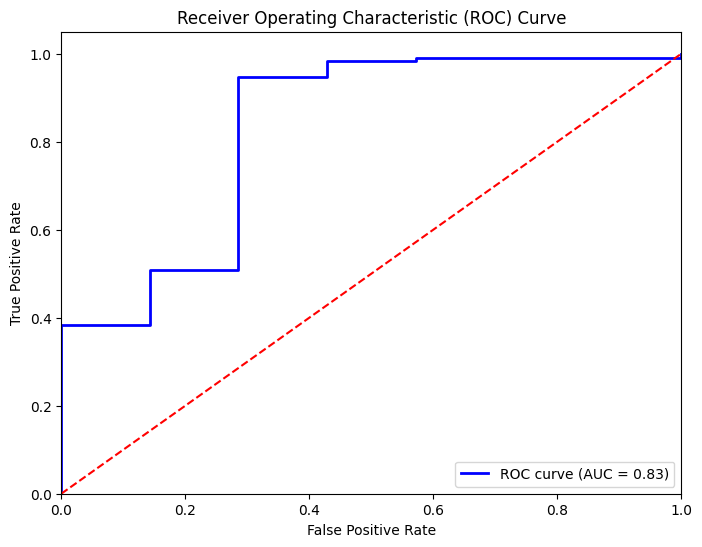

In [99]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


To get the global feature importance, we must build the  ExplainableBoostingRegressor to determine the factors influencing the anomaly detection.

In [100]:
X=total_df.drop(columns=['Transaction_ID','Predicted_Class','Anomaly_Score','Anomaly_Decile'])

In [101]:
y = total_df['Anomaly_Score']

In [102]:
!pip install interpret-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 41.3 MB/s eta 0:00:00


In [103]:
from interpret.glassbox import ExplainableBoostingRegressor
ebm = ExplainableBoostingRegressor(random_state=1, interactions=0)

ebm.fit(X, y);

In [104]:
total_scored_df = pd.concat([total_df,
                             pd.DataFrame(ebm.predict(X), columns=['EBM_Score'])],
                            axis=1)

In [105]:
total_scored_df

,Predicted_Class,Anomaly_Score,Anomaly_Decile,Transaction_ID,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,...,Account_Type_Savings,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income,Distance,EBM_Score
0,1,0.109067,2,TX0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.046877,0.450447,-0.167190,-0.018383,1.634423,-0.335987,1.568007,-0.110896,0.084953
1,1,0.122547,1,TX1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.085276,1.347752,0.946939,-1.196766,0.796810,0.025990,-0.775688,-0.032060,0.116318
2,1,0.099041,3,TX2,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,-0.236970,-1.344162,-0.542425,-1.668119,-0.399781,1.473897,-0.314592,-0.081970,0.091033
3,1,0.066888,7,TX3,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.009525,-0.446858,-1.511008,0.924324,1.514764,1.473897,-0.798977,-0.121385,0.086643
4,1,0.079467,5,TX4,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.138814,-1.344162,0.311731,-1.196766,-0.998076,1.111920,-0.710830,-0.154889,0.080092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.106470,2,TX995,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,-0.483293,0.450447,-1.179287,1.160000,0.437833,0.387967,-1.361820,-0.017669,0.090432
996,1,0.123677,1,TX996,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.385128,1.347752,1.338850,-0.489736,1.155787,1.256711,0.038977,0.009672,0.101849
997,1,0.058609,8,TX997,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.307654,-0.446858,1.073654,0.217294,1.514764,1.256711,1.328784,-0.132968,0.056809
998,1,0.029084,10,TX998,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,-0.369853,1.347752,-0.308266,-0.489736,-0.878417,1.256711,-1.552078,-0.025540,0.030990


In [106]:
fig = px.scatter(total_scored_df, x='Anomaly_Score', y='EBM_Score',
                 height=550, width=550,
                 labels={"Anomaly_Score": "Actual Anomaly Score", "EBM_Score": "Predicted Anomaly Score"},
                 title="Predicted vs Actual Anomaly Score")

fig.update_layout(yaxis={'scaleanchor': 'x', 'scaleratio': 1},
                  hovermode=False)

fig.add_annotation(text=f"R\u00b2 = {ebm.score(X, y):.2f}", x=0.88, y=0.2,
                   xref='paper', yref='paper', showarrow=False)

fig.show()


# **Global Feature Importance:**

In [107]:
NUM_GLOBAL_FEATURES_TO_SHOW = 10

ebm_global = ebm.explain_global()

global_importance_df  = pd.DataFrame(ebm_global.data()).sort_values(by=['scores'], ascending=False, ignore_index=True)

temp_df = global_importance_df[: NUM_GLOBAL_FEATURES_TO_SHOW]

fig = px.bar(temp_df, x='scores', y='names', orientation='h',
             labels={'names':'', 'scores':''},
             title=f"Global Feature Importance - Top {NUM_GLOBAL_FEATURES_TO_SHOW} Features")

fig.update_layout(yaxis=dict(autorange='reversed'), hovermode=False)

fig.show()

# **Local Explainability Examples:**

Local explainability refers to the process of explaining the predictions or decisions of a machine learning model at an individual data point level.This is in contrast to global explainability, which focuses on explaining the overall behavior of the model across the entire dataset.

In [108]:
total_df.head()

,Predicted_Class,Anomaly_Score,Anomaly_Decile,Transaction_ID,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,...,Account_Type_Current,Account_Type_Savings,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income,Distance
0,1,0.109067,2,TX0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.046877,0.450447,-0.167190,-0.018383,1.634423,-0.335987,1.568007,-0.110896
1,1,0.122547,1,TX1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.085276,1.347752,0.946939,-1.196766,0.796810,0.025990,-0.775688,-0.032060
2,1,0.099041,3,TX2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-0.236970,-1.344162,-0.542425,-1.668119,-0.399781,1.473897,-0.314592,-0.081970
3,1,0.066888,7,TX3,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.009525,-0.446858,-1.511008,0.924324,1.514764,1.473897,-0.798977,-0.121385
4,1,0.079467,5,TX4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.138814,-1.344162,0.311731,-1.196766,-0.998076,1.111920,-0.710830,-0.154889


In [109]:
total_df.columns

Index(['Predicted_Class', 'Anomaly_Score', 'Anomaly_Decile', 'Transaction_ID',
       'Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday', 'Time_of_Day_00:00', 'Time_of_Day_01:00',
       'Time_of_Day_02:00', 'Time_of_Day_03:00', 'Time_of_Day_04:00',
       'Time_of_Day_05:00', 'Time_of_Day_06:00', 'Time_of_Day_07:00',
       'Time_of_Day_08:00', 'Time_of_Day_09:00', 'Time_of_Day_10:00',
       'Time_of_Day_11:00', 'Time_of_Day_12:00', 'Time_of_Day_13:00',
       'Time_of_Day_14:00', 'Time_of_Day_15:00', 'Time_of_Day_16:00',
       'Time_of_Day_17:00', 'Time_of_Day_18:00', 'Time_of_Day_19:00',
       'Time_of_Day_20:00', 'Time_of_Day_21:00', 'Time_of_Day_22:00',
       'Time_of_Day_23:00', 'Gender_Female', 'Gender_Male',
       'Account_Type_Current', 'Account_Type_Savings', 'Transaction_Amount',
       'Transaction_Volume', 'Average_Transaction_Amount',
       'Fr

 # Preparing a DataFrame for the local explanability analysis by reshaping and filtering the data in general  for the customer with Transaction_ID = TX0                        

In [110]:
# `total_df`  = df, `ebm` is the trained EBM model
# Define the synthetic value
synthetic_value = 0  # we can set this to any constant value

# Select the index number of the data point for which we want to generate explanation scores
selected_index = 0 # Modify this to the desired index number

# Create an empty dataframe to store explanation scores
explanation_scores_df = pd.DataFrame(columns=['Transaction_ID', 'Feature', 'Explanation_Score'])

# Get the data point at the selected index
selected_data_point = total_df.iloc[selected_index]

# Define features and select relevant columns from total_df
features = data.drop(columns=['Transaction_ID'])

# Iterate over each feature
for feature in features:
    # Copy the dataset to avoid modifying the original data
    synthetic_data = total_df.copy()

    # Set the current feature to a constant value for the selected data point
    synthetic_data.loc[selected_index, feature] = synthetic_value

    # Predict using the synthetic data
    predictions = ebm.predict(synthetic_data)

    # Calculate the change in predictions compared to the original data
    change_in_predictions = predictions - ebm.predict(total_df)

    # Store the change in predictions as the explanation score for the current feature
    df_to_append = pd.DataFrame({
        'Transaction_ID': total_df['Transaction_ID'],
        'Feature': [feature] * len(total_df),
        'Explanation_Score': change_in_predictions
    })
    explanation_scores_df = pd.concat([explanation_scores_df, df_to_append], ignore_index=True)

# Convert Explanation_Score column to numeric
explanation_scores_df['Explanation_Score'] = pd.to_numeric(explanation_scores_df['Explanation_Score'], errors='coerce')

# Remove rows with missing or non-numeric Explanation_Score values
explanation_scores_df = explanation_scores_df.dropna(subset=['Explanation_Score'])

# Filter the dataframe for the selected Transaction_ID
selected_transaction_id = selected_data_point['Transaction_ID']
explanation_scores_df = explanation_scores_df[explanation_scores_df['Transaction_ID'] == selected_transaction_id]

# Sort the dataframe by absolute value of explanation score
explanation_scores_df = explanation_scores_df.sort_values('Explanation_Score',
                                                          ascending=False)\
                                             .reset_index(drop=True)

# Print the explanation scores for the selected Transaction_ID
print(explanation_scores_df)


   Transaction_ID                      Feature  Explanation_Score
0             TX0  Time_Since_Last_Transaction           0.010759
1             TX0                       Income           0.002655
2             TX0           Transaction_Volume           0.000708
3             TX0                          Age           0.000245
4             TX0    Frequency_of_Transactions           0.000000
5             TX0                  Day_of_Week           0.000000
6             TX0                  Time_of_Day           0.000000
7             TX0                       Gender           0.000000
8             TX0                 Account_Type           0.000000
9             TX0           Transaction_Amount          -0.000172
10            TX0   Average_Transaction_Amount          -0.000362


 # Preparing a DataFrame for the local explanability analysis by reshaping and filtering the data in particular for the customer with Transaction_ID = TX0                        

In [111]:
max_score_trans_id = total_df.sort_values('Anomaly_Score', ascending=False).head(1)['Transaction_ID'].reset_index(drop=True)[0]
min_score_trans_id = total_df.sort_values('Anomaly_Score', ascending=True).head(1)['Transaction_ID'].reset_index(drop=True)[0]

print(max_score_trans_id)
print(min_score_trans_id)

TX877
TX143


In [112]:
def create_local_df(trans_id):

    # Define features and select relevant columns from total_df
    features = data.drop(columns=['Transaction_ID'])

    # Define the name of the "Transaction_ID" column
    transaction_id_column = 'Transaction_ID'

    # Create a list containing the "Transaction_ID" column name and the features
    columns_to_select = data.columns

    # Copy total_df and select relevant columns
    data_values_df = pd.concat([data['Transaction_ID'], features], axis=1)

    # Apply custom formats to specific columns if necessary
    # data_values_df['Transaction Amount'] = data_values_df['Transaction Amount'].apply("{:,.2f}".format)
    # data_values_df['Transaction Volume'] = data_values_df['Transaction Volume'].apply("{:,.2f}".format)

    # Reshape the DataFrame using melt to create a long-format DataFrame suitable for printing
    data_values_df = data_values_df.melt(id_vars=[transaction_id_column], value_name='data_value')

    # Convert the 'data_value' column to string type
    data_values_df['data_value'] = data_values_df['data_value'].astype(str)

    # Remove quotes from data_value column
    data_values_df['data_value'] = data_values_df['data_value'].str.replace("'", "")

    # Generate labels combining feature names and their corresponding values
    data_values_df['label'] = data_values_df['variable'].astype(str) + " = " + data_values_df['data_value'].astype(str)

    # Filter the DataFrame based on the provided trans_id
    filtered_df = data_values_df[data_values_df[transaction_id_column] == trans_id].reset_index(drop=True)

    derived_vars=['Predicted_Class','Anomaly_Score','Anomaly_Decile','Transaction_ID']
    front_score_df=total_scored_df[derived_vars]
    local_df = pd.merge(front_score_df, filtered_df, on='Transaction_ID')
    local_df['Explanation_Score'] = explanation_scores_df['Explanation_Score']
    local_df['EBM_Score'] = total_scored_df['EBM_Score']
    return local_df

In [113]:
create_local_df(max_score_trans_id).head()

,Predicted_Class,Anomaly_Score,Anomaly_Decile,Transaction_ID,variable,data_value,label,Explanation_Score,EBM_Score
0,1,0.15085,1,TX877,Transaction_Amount,1024.840625356796,Transaction_Amount = 1024.840625356796,0.010759,0.084953
1,1,0.15085,1,TX877,Transaction_Volume,3,Transaction_Volume = 3,0.002655,0.116318
2,1,0.15085,1,TX877,Average_Transaction_Amount,983.180372020269,Average_Transaction_Amount = 983.180372020269,0.000708,0.091033
3,1,0.15085,1,TX877,Frequency_of_Transactions,9,Frequency_of_Transactions = 9,0.000245,0.086643
4,1,0.15085,1,TX877,Time_Since_Last_Transaction,14,Time_Since_Last_Transaction = 14,0.000000,0.080092


In [114]:
create_local_df(min_score_trans_id).head()

,Predicted_Class,Anomaly_Score,Anomaly_Decile,Transaction_ID,variable,data_value,label,Explanation_Score,EBM_Score
0,-1,-0.041196,10,TX143,Transaction_Amount,952.5300555584028,Transaction_Amount = 952.5300555584028,0.010759,0.084953
1,-1,-0.041196,10,TX143,Transaction_Volume,3,Transaction_Volume = 3,0.002655,0.116318
2,-1,-0.041196,10,TX143,Average_Transaction_Amount,1052.647641296748,Average_Transaction_Amount = 1052.647641296748,0.000708,0.091033
3,-1,-0.041196,10,TX143,Frequency_of_Transactions,12,Frequency_of_Transactions = 12,0.000245,0.086643
4,-1,-0.041196,10,TX143,Time_Since_Last_Transaction,22,Time_Since_Last_Transaction = 22,0.000000,0.080092


# **Records with Highest Anomaly Score:**

In [115]:
def explain_local_anomaly_score(trans_id):
    import plotly.express as px

    df = create_local_df(trans_id).copy()

    # Filter the DataFrame for the specific transaction ID
    filtered_df = df[df['Transaction_ID'] == trans_id]

    # Sort the DataFrame by absolute value of explanation score
    filtered_df = filtered_df.sort_values('Explanation_Score', ascending=False)

    # Filter out records with zero explanation_score
    filtered_df = filtered_df[filtered_df['Explanation_Score'] != 0]

    if filtered_df.empty:
        print(f"No non-zero explanation scores found for Transaction ID {trans_id}")
        return

    # Assign colors based on influence
    filtered_df['color'] = filtered_df['Explanation_Score'].apply(lambda x: 'red' if x > 0 else 'green')

    # Plot the bar diagram
    fig = px.bar(filtered_df, x='Explanation_Score', y='label', color='color', orientation='h', height=450,
                labels={'label': '', 'Explanation_Score': 'Explanation Score'},
                title=f"Local Explanation for Transaction ID {trans_id}")

    fig.update_layout(yaxis=dict(autorange='reversed'),
                    showlegend=False,  # Disable legend to remove color legend
                    hovermode=False)

    fig.show()

In [116]:
explain_local_anomaly_score(max_score_trans_id)

# **Record with Lowest Anomaly Score**

In [117]:
explain_local_anomaly_score(min_score_trans_id)

# **API Development using Flask**

In [118]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


# **Exporting the isolation forest model in the local machine/session**

In [119]:
import joblib
joblib.dump(best_iso_model, 'isolation_forest_model.pkl')

['isolation_forest_model.pkl']

# **Creating a Flask Application**